In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

In [114]:
df = pd.read_csv('heart.csv')

In [115]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
716,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
717,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
718,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [116]:
df.describe()

,age,sex,cp,num
count,720.000000,720.000000,720.000000,720.000000
mean,51.888889,0.738889,3.179167,0.850000
std,9.193720,0.439546,0.953646,1.076878
min,28.000000,0.000000,1.000000,0.000000
25%,45.000000,0.000000,2.000000,0.000000
50%,53.000000,1.000000,4.000000,0.500000
75%,58.000000,1.000000,4.000000,1.000000
max,77.000000,1.000000,4.000000,4.000000


In [117]:
df.replace('?',np.nan,inplace=True)
df.isna().sum()

age           0
sex           0
cp            0
trestbps      3
chol         23
fbs          83
restecg       2
thalach       2
exang         2
oldpeak       6
slope       207
ca          413
thal        320
num           0
dtype: int64

In [118]:
df.fillna(df.median(),inplace=True)

In [119]:
df
for col in df.columns:
    df[col]=pd.to_numeric(df[col])

In [120]:
df.isna().sum()
df.dtypes


age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
num           int64
dtype: object

In [121]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,70.0,1.0,4.0,115.0,0.0,0.0,1.0,92.0,1.0,0.0,2.0,0.0,7.0,1
716,70.0,1.0,4.0,140.0,0.0,1.0,0.0,157.0,1.0,2.0,2.0,0.0,7.0,3
717,72.0,1.0,3.0,160.0,0.0,0.0,2.0,114.0,0.0,1.6,2.0,2.0,6.0,0
718,73.0,0.0,3.0,160.0,0.0,0.0,1.0,121.0,0.0,0.0,1.0,0.0,3.0,1


(array([ 12.,  35.,  80.,  99., 132., 156., 117.,  63.,  21.,   5.]),
 array([28. , 32.9, 37.8, 42.7, 47.6, 52.5, 57.4, 62.3, 67.2, 72.1, 77. ]),
 <BarContainer object of 10 artists>)

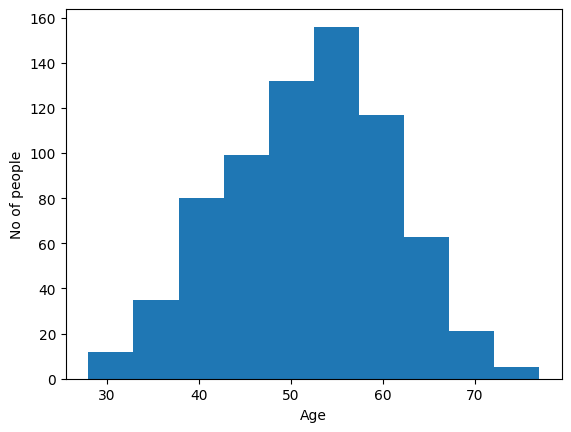

In [122]:
x=df['age']
plt.xlabel('Age')
plt.ylabel('No of people')
plt.hist(x)

<Axes: ylabel='num'>

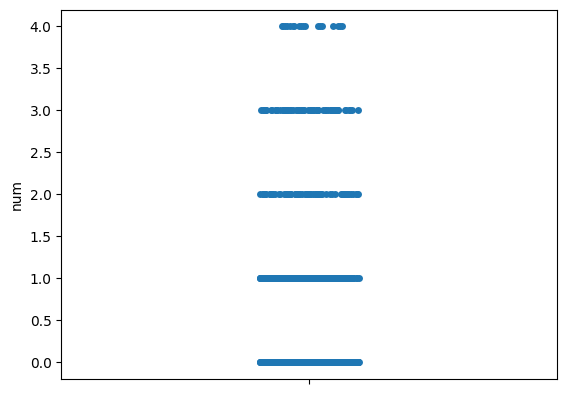

In [123]:
data = df['num']
sns.stripplot(data)

[]

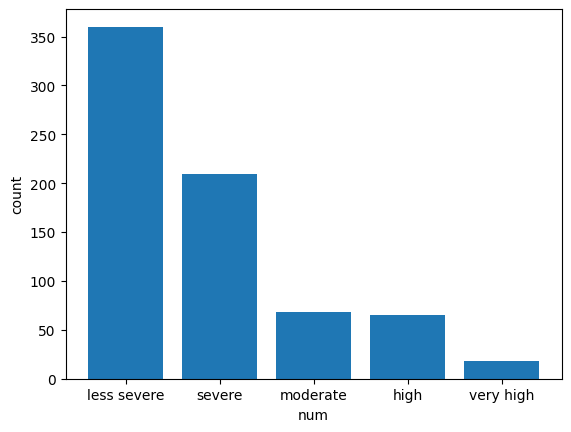

In [124]:
target = df['num'].value_counts()
labels = ['less severe', 'severe', 'moderate', 'high', 'very high']
# labels = target.index
count = target.values
plt.bar(labels, count)

plt.xlabel('num')
plt.ylabel('count')
plt.plot()

Text(0.5, 1.0, 'Age vs Chance')

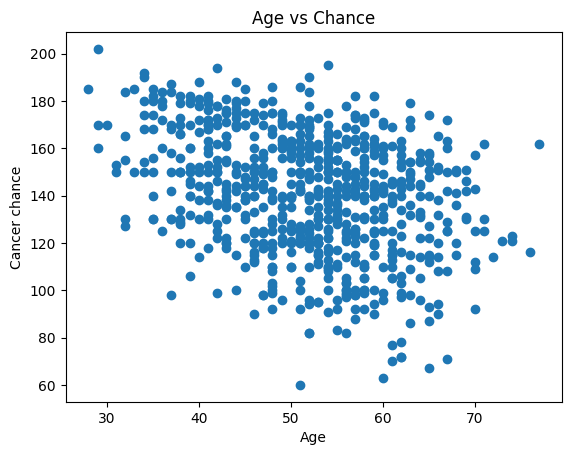

In [125]:
x=df['age']
y=df['thalach']
plt.scatter(x,y)
plt.xlabel('Age')
plt.ylabel('Cancer chance')
plt.title("Age vs Chance")

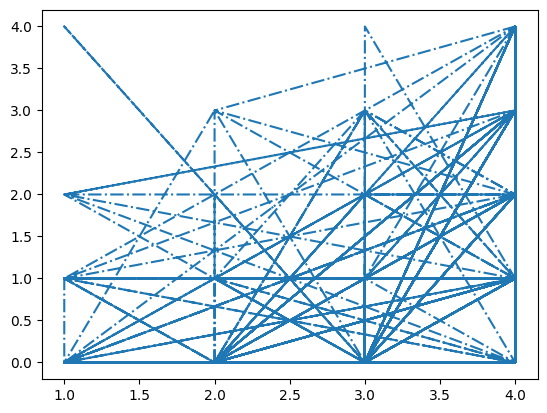

In [126]:
x=df['cp']
y=df['num']
plt.plot(x,y,'-.')
plt.show()

In [127]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.026807,0.159796,0.251146,-0.090822,0.151438,0.234541,-0.333228,0.136617,0.220491,-0.017137,0.332501,-0.013117,0.285736
sex,-0.026807,1.000000,0.154897,-0.009090,-0.196348,0.024311,-0.047361,-0.145654,0.155223,0.065517,0.055929,0.007127,0.276192,0.237417
cp,0.159796,0.154897,1.000000,0.005139,-0.166653,-0.012503,0.017335,-0.340494,0.421576,0.237809,0.086628,0.120250,0.172053,0.436561
trestbps,0.251146,-0.009090,0.005139,1.000000,0.077528,0.130709,0.095519,-0.116144,0.129852,0.164330,0.036575,0.049393,0.051128,0.101284
chol,-0.090822,-0.196348,-0.166653,0.077528,1.000000,0.099512,0.143714,0.260146,-0.033209,0.089224,-0.026482,0.156435,-0.110688,-0.312253
fbs,0.151438,0.024311,-0.012503,0.130709,0.099512,1.000000,0.114526,0.030066,0.044384,0.056310,0.017180,0.159152,0.001454,0.076237
restecg,0.234541,-0.047361,0.017335,0.095519,0.143714,0.114526,1.000000,0.082454,0.034854,0.149793,-0.069466,0.305165,-0.152267,0.164676
thalach,-0.333228,-0.145654,-0.340494,-0.116144,0.260146,0.030066,0.082454,1.000000,-0.357369,-0.149809,-0.278716,-0.003580,-0.249202,-0.368449
exang,0.136617,0.155223,0.421576,0.129852,-0.033209,0.044384,0.034854,-0.357369,1.000000,0.370037,0.174837,0.070614,0.207520,0.358739
oldpeak,0.220491,0.065517,0.237809,0.164330,0.089224,0.056310,0.149793,-0.149809,0.370037,1.000000,0.220260,0.276989,0.145267,0.395343


<Axes: >

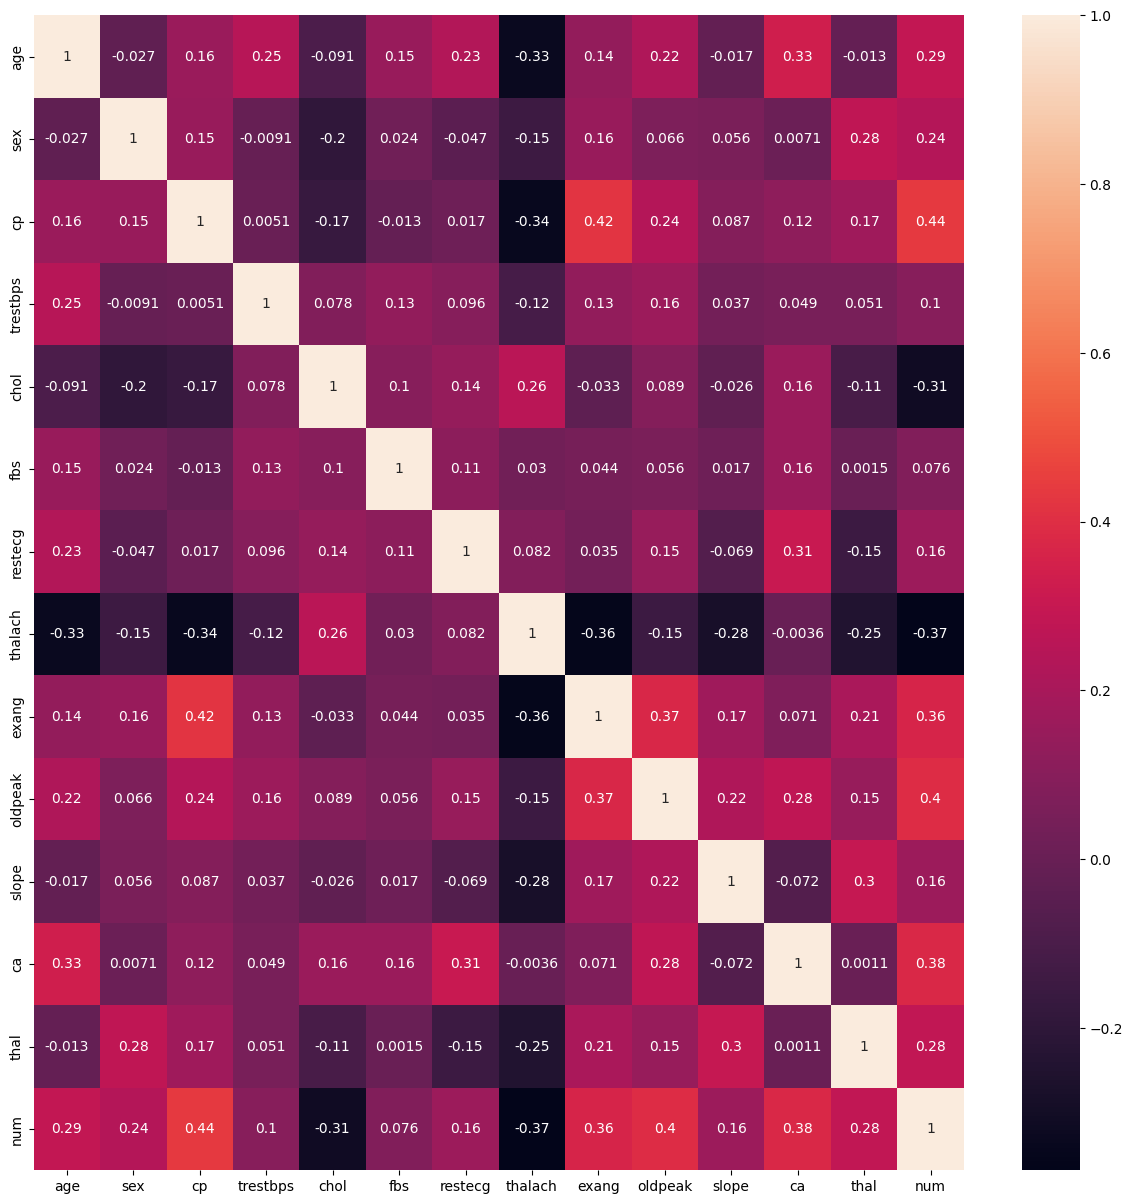

In [129]:



figure(figsize=(15,15
                ))
sns.heatmap(df.corr(),annot=True)